In [10]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np


In [11]:
conformer = mol_from_molfile('mol.txt')

In [12]:
# conformer.GetId(0)

In [13]:
# node_2_mol = Chem.MolFromSmiles(network.nodes[3])
# node_2_mol.GetNumAtoms()

In [14]:
# test_atom = node_2_mol.GetAtomWithIdx(2)

In [15]:
# list(test_atom.GetPropNames())

In [16]:
# test_atom.GetProp('molAtomMapNumber')

In [17]:
# Chem.MolToSmiles(node_2_mol)

In [18]:
# node_2_mol.GetNumAtoms()

In [19]:
mol_dict = mol_from_molfile('mol.txt')

In [20]:
mol, xyz_coords = mol_dict['Molecule'], mol_dict['xyz_pos']

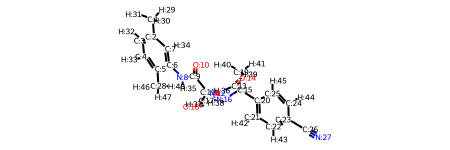

In [21]:
mol

In [22]:
len(xyz_coords)

48

In [23]:
mol1nodemols = get_scaffold_vertices(mol)

[13:43:34] Running LargestFragmentChooser
[13:43:34] Fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31]
[13:43:34] New largest fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31] (48)


In [24]:
ring_frags = find_smallest_rings(mol1nodemols)
mol_frame = ff._initialize_molecule_frame(mol,xyz_coords)
mol_frame

,atomNum,inRing,molPart,xyz
0,6,False,Unknown,"[-4.383, 4.6364, 1.8883]"
1,6,True,Unknown,"[-4.2825, 3.3225, 1.1707]"
2,6,True,Unknown,"[-5.1484, 3.0193, 0.1213]"
3,6,True,Unknown,"[-5.0252, 1.8092, -0.5585]"
4,6,True,Unknown,"[-4.03, 0.8799, -0.208]"
5,6,True,Unknown,"[-3.1372, 1.184, 0.8431]"
6,6,True,Unknown,"[-3.2746, 2.4073, 1.5129]"
7,7,False,Unknown,"[-2.1265, 0.2483, 1.1713]"
8,6,False,Unknown,"[-1.191, 0.3201, 2.1943]"
9,8,False,Unknown,"[-1.1262, 1.1862, 3.0622]"


In [25]:
ring_frags


In [26]:
list(np.array(xyz_coords).T[0])

[-4.383,
 -4.2825,
 -5.1484,
 -5.0252,
 -4.03,
 -3.1372,
 -3.2746,
 -2.1265,
 -1.191,
 -1.1262,
 -0.2355,
 0.5272,
 1.7658,
 2.4077,
 2.2101,
 1.0462,
 0.0758,
 -1.037,
 2.3072,
 3.4999,
 3.5567,
 4.7556,
 5.925,
 5.8894,
 4.6908,
 7.1513,
 8.1426,
 -3.9545,
 -3.7164,
 -4.1094,
 -5.4072,
 -5.9247,
 -5.7166,
 -2.5991,
 -2.1034,
 0.4479,
 -0.8236,
 0.8638,
 2.5125,
 1.3713,
 3.1009,
 2.6705,
 4.7658,
 6.7895,
 4.6982,
 -4.778,
 -4.0226,
 -3.0191]

In [27]:
ring_atom_indices = ff._identify_ring_atom_index(mol,ring_frags)

In [28]:
ring_indices_nosubset = ff._remove_subset_rings(ring_atom_indices)

In [29]:
ring_indices_nosubset

[(1, 2, 3, 4, 5, 6),
 (19, 20, 21, 22, 23, 24),
 (1, 2, 3, 4, 5, 6),
 (19, 20, 21, 22, 23, 24),
 (14, 12, 13, 11, 16, 17, 15)]

In [30]:
ff._assign_rings_to_mol_frame(ring_indices_nosubset,mol_frame)

,atomNum,inRing,molPart,xyz
0,6,False,Unknown,"[-4.383, 4.6364, 1.8883]"
1,6,True,Ring 3,"[-4.2825, 3.3225, 1.1707]"
2,6,True,Ring 3,"[-5.1484, 3.0193, 0.1213]"
3,6,True,Ring 3,"[-5.0252, 1.8092, -0.5585]"
4,6,True,Ring 3,"[-4.03, 0.8799, -0.208]"
5,6,True,Ring 3,"[-3.1372, 1.184, 0.8431]"
6,6,True,Ring 3,"[-3.2746, 2.4073, 1.5129]"
7,7,False,Unknown,"[-2.1265, 0.2483, 1.1713]"
8,6,False,Unknown,"[-1.191, 0.3201, 2.1943]"
9,8,False,Unknown,"[-1.1262, 1.1862, 3.0622]"


In [31]:
ff._set_hydrogens_in_ring(mol_frame,mol)

,atomNum,inRing,molPart,xyz
0,6,False,Unknown,"[-4.383, 4.6364, 1.8883]"
1,6,True,Ring 3,"[-4.2825, 3.3225, 1.1707]"
2,6,True,Ring 3,"[-5.1484, 3.0193, 0.1213]"
3,6,True,Ring 3,"[-5.0252, 1.8092, -0.5585]"
4,6,True,Ring 3,"[-4.03, 0.8799, -0.208]"
5,6,True,Ring 3,"[-3.1372, 1.184, 0.8431]"
6,6,True,Ring 3,"[-3.2746, 2.4073, 1.5129]"
7,7,False,Unknown,"[-2.1265, 0.2483, 1.1713]"
8,6,False,Unknown,"[-1.191, 0.3201, 2.1943]"
9,8,False,Unknown,"[-1.1262, 1.1862, 3.0622]"


In [32]:
mol.GetAtomWithIdx(0).GetNeighbors()[0]

In [33]:
ff.generate_full_mol_frame(mol,xyz_coords)

[13:43:34] Running LargestFragmentChooser
[13:43:34] Fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31]
[13:43:34] New largest fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31] (48)


,atomNum,inRing,molPart,xyz
0,6,False,Peripheral 1,"[-4.383, 4.6364, 1.8883]"
1,6,True,Ring 3,"[-4.2825, 3.3225, 1.1707]"
2,6,True,Ring 3,"[-5.1484, 3.0193, 0.1213]"
3,6,True,Ring 3,"[-5.0252, 1.8092, -0.5585]"
4,6,True,Ring 3,"[-4.03, 0.8799, -0.208]"
5,6,True,Ring 3,"[-3.1372, 1.184, 0.8431]"
6,6,True,Ring 3,"[-3.2746, 2.4073, 1.5129]"
7,7,False,Linker 1,"[-2.1265, 0.2483, 1.1713]"
8,6,False,Linker 1,"[-1.191, 0.3201, 2.1943]"
9,8,False,Linker 1,"[-1.1262, 1.1862, 3.0622]"


In [34]:
fragment_smiles = ff._trim_molpart(mol_frame,mol_frame['molPart'].unique(),mol)

In [35]:
full_smi = ff._break_molparts(fragment_smiles['smiles'],fragment_smiles['count']
                               ,drop_parent=True,patt='[$([C;X4;!R]):1]-[$([R,!$([C;X4]);!#0;!#9;!#17;!#35;!#1]):2]')

,Smiles,Molecule
0,[2*][NH:8][C:9]([8*])=[O:10],
1,[3*][N:12]1[C:13](=[O:14])[C@@:15]([4*])([7*])...,
2,[4*][CH3:19],
3,[1*][CH3:1],
4,[5*][c:23]1[cH:22][cH:21][c:20]([7*])[cH:25][c...,
5,[3*][CH2:11][8*],
6,[1*][c:2]1[cH:3][cH:4][c:5]([6*])[c:6]([2*])[c...,
7,[6*][CH3:28],
8,[5*][C:26]#[N:27],

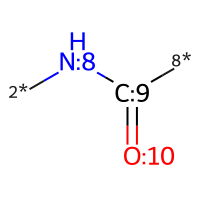
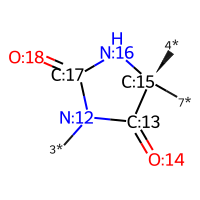
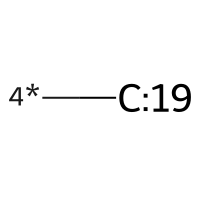
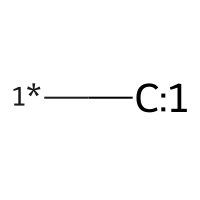
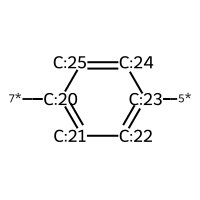
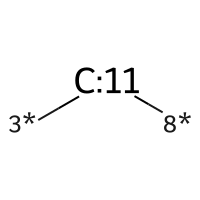
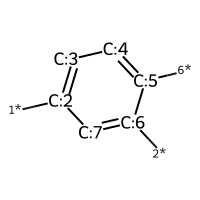
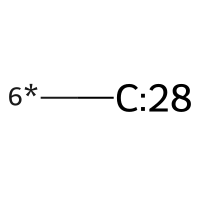
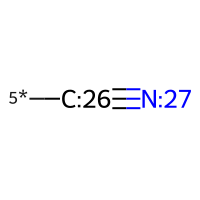

In [36]:
ff._generate_fragment_frame(full_smi)

In [37]:
frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
mol = Chem.MolFromMolFile('mol.txt')
frag_frame

[13:43:34] Running LargestFragmentChooser
[13:43:34] Fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31]
[13:43:34] New largest fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31] (48)


ValueError: Length of values (48) does not match length of index (9)

[10, 11, 12, 25, 26, 27, 28]
10
9
[2.1614951848, 0.0987681757, -0.3856958646]
[False, True, False, False, False]
[1.0178751918, -0.2572102126, 0.4158366157]
[2, 6, 8, 9, 19, 22, 23, 24]
2
1
[-0.3923738854, 0.0967594812, -0.1272617014]
[False, False, False, False, True]
[-0.4535358949, 0.2234540606, -1.6469131302]
[3, 4, 5, 16, 17, 18]
3
2
[-0.9739272989, 1.2613052532, 0.5309204078]
[False, True, False, False, False]
[-0.3923738854, 0.0967594812, -0.1272617014]
[7, 20, 21]
7
6
[-1.7727338429, -2.0346443043, -0.4117740679]
[False, True, False, False, False]
[-0.8644637082, -1.2791216843, 0.4143152418]
[1, 13, 14, 15]
1
2
[-0.4535358949, 0.2234540606, -1.6469131302]
[False, True, False, False, False]
[-0.3923738854, 0.0967594812, -0.1272617014]


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,H_xyz,at_idx
0,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]","[1.364426704830303, -0.1493379737212121, 0.172...",0
1,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]","[-0.43500195262727276, 0.18506176381212122, -1...",0
2,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]","[-0.5744764694252525, 0.46141522798787876, 0.0...",0
3,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]","[-1.1488715281565656, -1.5156994744010102, 0.1...",0
4,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]","[-0.41090782767272727, 0.13515177798787878, -0...",0

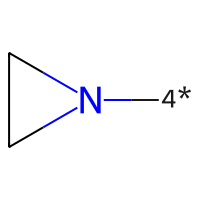
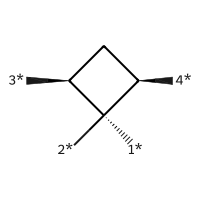
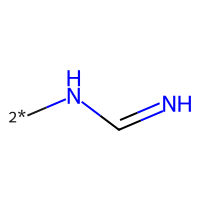
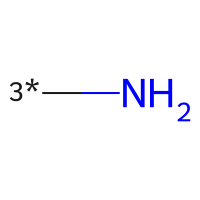
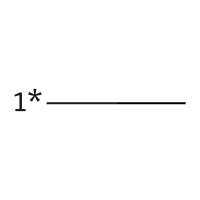

In [ ]:
ff.output_ifc_gjf(mol,frag_frame)

,Smiles,xyz,Molecule,count,numAttachments
0,*N1CC1,"[[2.1614951848, 0.0987681757, -0.3856958646], ...",,1,1
1,*C,"[[-0.4535358949, 0.2234540606, -1.6469131302],...",,1,1
2,*[C@@H]1C[C@H](*)C1(*)*,"[[-0.3923738854, 0.0967594812, -0.1272617014],...",,1,4
3,*N,"[[-1.7727338429, -2.0346443043, -0.4117740679]...",,1,1
4,*NC=N,"[[-0.9739272989, 1.2613052532, 0.5309204078], ...",,1,1

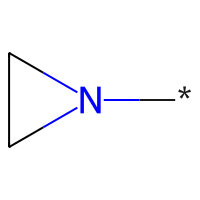
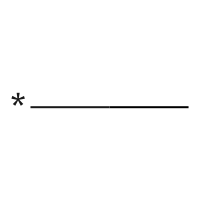
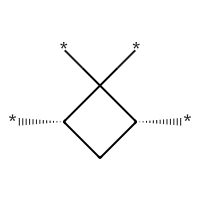
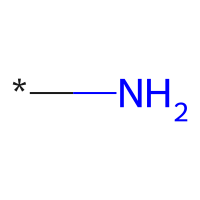
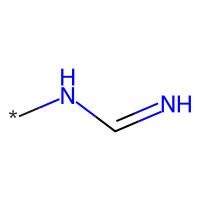

In [ ]:
ff.count_uniques(frag_frame)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]"
1,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]"
2,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]"
3,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]"
4,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]"

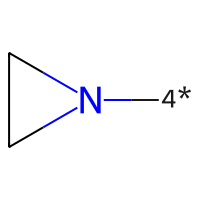
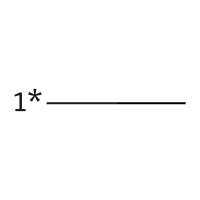
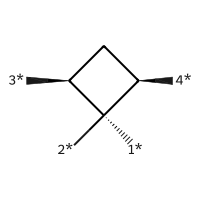
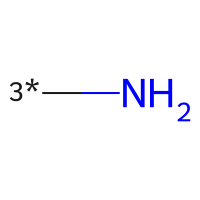
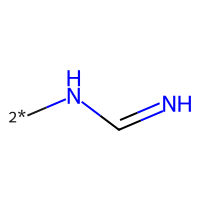

In [ ]:
frag_frame

In [ ]:
list(frag_frame.columns)

['Smiles', 'Molecule', 'numAttachments', 'Atoms', 'xyz', 'Labels']

In [ ]:
xyz_coords[0]

[0.9934, 1.4958, -1.0601]

In [ ]:
test_at = mol.GetAtomWithIdx(0)

In [ ]:
for test_at in mol.GetAtoms():
    test_at.ClearProp('molAtomMapNumber')

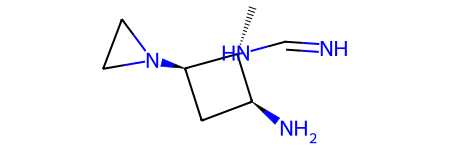

In [ ]:
mol

In [ ]:
xyz_from_cml('cml.txt')

[[-0.4535358949, 0.2234540606, -1.6469131302],
 [-0.3923738854, 0.0967594812, -0.1272617014],
 [-0.9739272989, 1.2613052532, 0.5309204078],
 [-2.3061639593, 1.5208333492, 0.5862179213],
 [-3.2105780508, 0.6968934172, 0.2794285903],
 [-0.8644637082, -1.2791216843, 0.4143152418],
 [-1.7727338429, -2.0346443043, -0.4117740679],
 [0.605360928, -1.7362453596, 0.4271652343],
 [1.0178751918, -0.2572102126, 0.4158366157],
 [2.1614951848, 0.0987681757, -0.3856958646],
 [2.8698080654, 1.308620243, -0.050858802],
 [3.4549510708, -0.0154556129, 0.2352463047],
 [0.080179527, 1.1136215794, -1.9647483359],
 [-0.0065310727, -0.6294532865, -2.1369999563],
 [-1.4844244748, 0.2972460666, -1.9676852362],
 [-0.3882507204, 2.0662769741, 0.5606715697],
 [-2.5133876958, 2.5177447362, 0.959564038],
 [-4.1169866791, 1.091255902, 0.4414637173],
 [-1.2173121541, -1.1389769619, 1.4342132274],
 [-1.9076522276, -2.9492677861, -0.0234428443],
 [-2.6608605685, -1.5688266572, -0.4147629255],
 [0.9416025871, -2.34202674

[11:58:29] Running LargestFragmentChooser
[11:58:29] Fragment: [C:1]1([H:32])~[C:2]([H:33])~[C:3]([H:34])~[C:4]([N:7]([C:8](=[O:9])[N:10]([C@:11]2([H:12])[C@@:13]3([H:14])[C:15]([H:39])([H:40])[O:16][C@:17]([H:18])([O:19]3)[C@:20]([H:21])([O:25][C:26]3~[C:27]([H:42])~[C:28]([H:43])~[C:29]([H:44])~[C:30]([H:45])~[C:31]~3[H:46])[C@@:22]2([H:23])[O:24][H:41])[H:38])[H:37])~[C:5]([H:35])~[C:6]~1[H:36]
[11:58:29] New largest fragment: [C:1]1([H:32])~[C:2]([H:33])~[C:3]([H:34])~[C:4]([N:7]([C:8](=[O:9])[N:10]([C@:11]2([H:12])[C@@:13]3([H:14])[C:15]([H:39])([H:40])[O:16][C@:17]([H:18])([O:19]3)[C@:20]([H:21])([O:25][C:26]3~[C:27]([H:42])~[C:28]([H:43])~[C:29]([H:44])~[C:30]([H:45])~[C:31]~3[H:46])[C@@:22]2([H:23])[O:24][H:41])[H:38])[H:37])~[C:5]([H:35])~[C:6]~1[H:36] (46)
[11:58:29] WARNING: not removing hydrogen atom with dummy atom neighbors
[11:58:29] WARNING: not removing hydrogen atom with dummy atom neighbors
[11:58:29] WARNING: not removing hydrogen atom with dummy atom neighbors
[11:

,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[1*][H],,1,[32],"[[-7.4038, 1.7328, -0.4525]]",[H]
1,[1*][C]1[C]([2*])~[C]([3*])~[C]([4*])~[C]([5*]...,,6,"[1, 6, 5, 4, 3, 2, 32, 33, 34, 35, 36]","[[-6.4267, 1.3417, -0.2341], [-5.769, 1.7001, ...","[C, C, C, C, C, C, H, H, H, H, H]"
2,[7*]O[14*],,2,[25],"[[1.6446, 0.6304, -0.2637]]",[O]
3,[7*][C]1[C]([8*])~[C]([9*])~[C]([10*])~[C]([11...,,6,"[26, 31, 30, 29, 28, 27, 42, 43, 44, 45, 46]","[[2.3397, 1.7905, -0.3638], [1.5799, 2.9513, -...","[C, C, C, C, C, C, H, H, H, H, H]"
4,[5*][H],,1,[35],"[[-4.0142, 1.4787, 2.1187]]",[H]
5,[11*][H],,1,[45],"[[1.5883, 5.0752, -0.246]]",[H]
6,[13*][C@H]1[C@H]([15*])[C@@H]([14*])[C@@H]2OC[...,,3,"[11, 13, 15, 16, 17, 19, 20, 22, 12, 14, 18, 2...","[[0.332, -2.2065, 0.1354], [1.2959, -2.5915, 1...","[C, C, C, O, C, O, C, C, H, H, H, H, H, H, H]"
7,[8*][H],,1,[42],"[[4.3208, 1.0041, -0.6479]]",[H]
8,[10*][H],,1,[44],"[[4.0294, 5.2517, -0.6042]]",[H]
9,[15*]O,,1,"[24, 41]","[[1.5929, -2.586, -1.8258], [1.9185, -2.2436, ...","[O, H]"

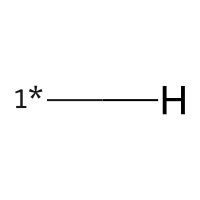
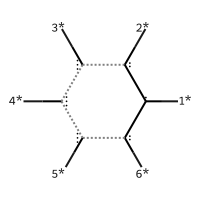
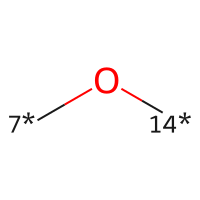
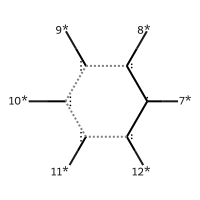
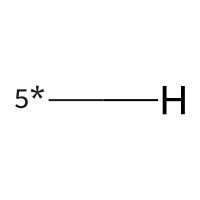
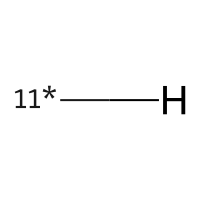
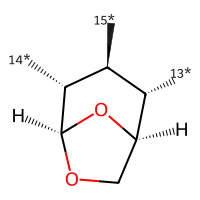
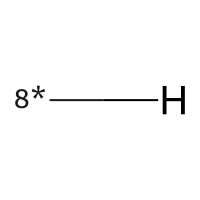
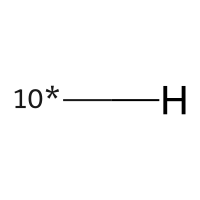
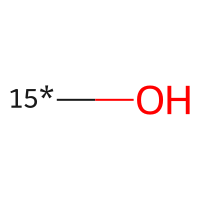
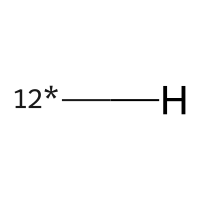
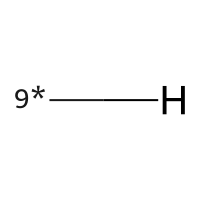
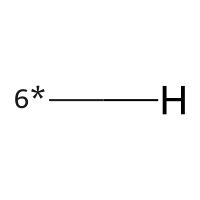
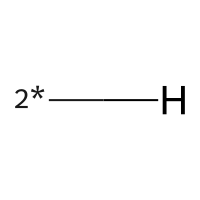
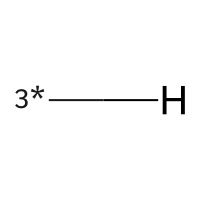
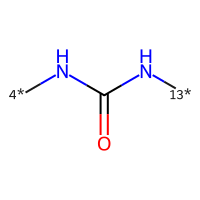

In [ ]:

ff.identify_connected_fragments('DUDE_12483238_hivint_decoys_C19H20N2O5_CIR.mol',input_type='molfile')

In [ ]:
from group_decomposition import utils
mol_creation = mol_from_molfile('DUDE_11814594_dpp4_decoys_C18H23N3O4S_CIR.mol')
ff.generate_full_mol_frame(mol_creation['Molecule'])

[12:02:00] Running LargestFragmentChooser
[12:02:00] Fragment: [C:1]([N:2]([C@:3]1([H:4])[C:5]([H:32])([H:33])[C:6]([H:34])([H:35])[O:7][C:8]1([H:36])[H:37])[C:9](=[O:10])[C@:11]1([H:12])[C:13]([H:38])([H:39])[C:14]2~[C:15]([S:16]~[C:17]([N:19]([C:20](=[O:21])[C:22]3([H:41])[C:23]([H:42])([H:43])[C:24]([H:44])([H:45])[C:25]3([H:46])[H:47])[H:40])~[N:18]~2)[C:26](=[O:27])[C:28]1([H:48])[H:49])([H:29])([H:30])[H:31]
[12:02:00] New largest fragment: [C:1]([N:2]([C@:3]1([H:4])[C:5]([H:32])([H:33])[C:6]([H:34])([H:35])[O:7][C:8]1([H:36])[H:37])[C:9](=[O:10])[C@:11]1([H:12])[C:13]([H:38])([H:39])[C:14]2~[C:15]([S:16]~[C:17]([N:19]([C:20](=[O:21])[C:22]3([H:41])[C:23]([H:42])([H:43])[C:24]([H:44])([H:45])[C:25]3([H:46])[H:47])[H:40])~[N:18]~2)[C:26](=[O:27])[C:28]1([H:48])[H:49])([H:29])([H:30])[H:31] (49)


,atomNum,inRing,molPart
0,6,False,Linker 1
1,7,False,Linker 1
2,6,True,Ring 1
3,1,False,Ring 1
4,6,True,Ring 1
5,6,True,Ring 1
6,8,True,Ring 1
7,6,True,Ring 1
8,6,False,Linker 1
9,8,False,Linker 1


In [ ]:
m = mol_creation['Molecule']

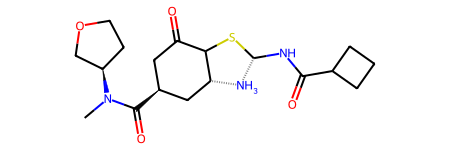

In [ ]:
Chem.MolFromSmiles(ff._clear_map_number(mol_creation['Molecule']))

[12:05:31] Running LargestFragmentChooser
[12:05:31] Fragment: [H]N(C1~N~C2C([H])([H])[C@@]([H])(C(=O)N(C([H])([H])[H])[C@@]3([H])C([H])([H])OC([H])([H])C3([H])[H])C([H])([H])C(=O)C~2S~1)C(=O)C1([H])C([H])([H])C([H])([H])C1([H])[H]
[12:05:31] New largest fragment: [H]N(C1~N~C2C([H])([H])[C@@]([H])(C(=O)N(C([H])([H])[H])[C@@]3([H])C([H])([H])OC([H])([H])C3([H])[H])C([H])([H])C(=O)C~2S~1)C(=O)C1([H])C([H])([H])C([H])([H])C1([H])[H] (49)


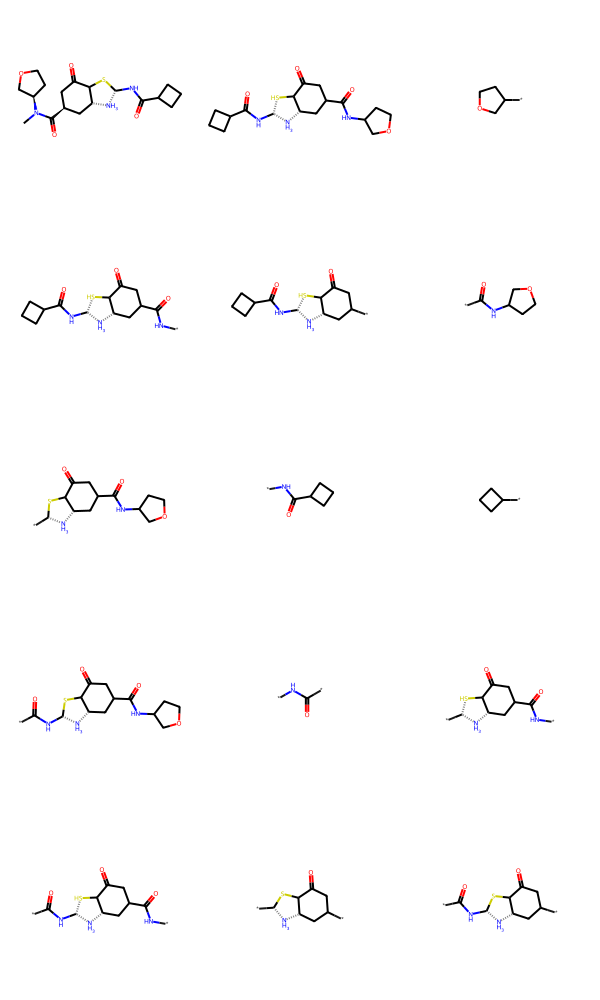

In [ ]:
Draw.MolsToGridImage(utils.get_scaffold_vertices(m))

[12:09:12] Running LargestFragmentChooser
[12:09:12] Fragment: [C:1]([N:2]1[c:3]2[c:4]([H:23])[c:5]([H:24])[c:6]([H:25])[c:7]([H:26])[c:8]2[C@@:9]([N+:13]([C:14]([c:15]2[c:16]([H:34])[c:17]([H:35])[n:18]([H:36])[n:19]2)([H:32])[H:33])([H:30])[H:31])([H:27])[C:10]([H:28])([H:29])[C:11]1=[O:12])([H:20])([H:21])[H:22]
[12:09:12] New largest fragment: [C:1]([N:2]1[c:3]2[c:4]([H:23])[c:5]([H:24])[c:6]([H:25])[c:7]([H:26])[c:8]2[C@@:9]([N+:13]([C:14]([c:15]2[c:16]([H:34])[c:17]([H:35])[n:18]([H:36])[n:19]2)([H:32])[H:33])([H:30])[H:31])([H:27])[C:10]([H:28])([H:29])[C:11]1=[O:12])([H:20])([H:21])[H:22] (36)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[3*]C[4*],,2,"[14, 32, 33]","[[-1.8396, 0.2013, -0.6817], [-1.521, 1.2171, ...","[C, H, H]"
1,[1*]N1C(=O)C[C@@H]([2*])c2ccccc21,,2,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 23, 24, 2...","[[2.3148, -0.41, 1.1412], [2.193, 0.5322, 0.07...","[N, C, C, C, C, C, C, C, C, C, O, H, H, H, H, ..."
2,[3*]c1cc[nH]n1,,1,"[15, 16, 17, 18, 19, 34, 35, 36]","[[-3.1757, -0.1244, -0.0964], [-4.3533, 0.6492...","[C, C, C, N, N, H, H, H]"
3,[2*][NH2+][4*],,2,"[13, 30, 31]","[[-0.8261, -0.7457, -0.1145], [-0.6359, -0.45,...","[N, H, H]"
4,[1*]C,,1,"[1, 20, 21, 22]","[[3.0611, -0.0488, 2.3441], [2.9729, -0.8137, ...","[C, H, H, H]"

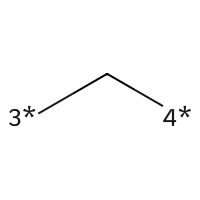
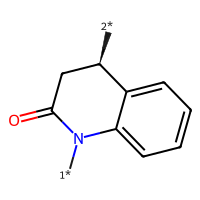
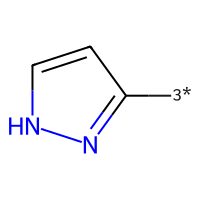
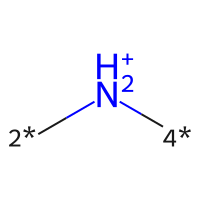
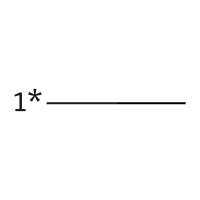

In [ ]:
ff.identify_connected_fragments('mol.txt',input_type='molfile')

[12:13:29] Running LargestFragmentChooser
[12:13:29] Fragment: [C:1]1([H:32])~[C:2]([H:33])~[C:3]([H:34])~[C:4]([N:7]([C:8](=[O:9])[N:10]([C@:11]2([H:12])[C@@:13]3([H:14])[C:15]([H:39])([H:40])[O:16][C@:17]([H:18])([O:19]3)[C@:20]([H:21])([O:25][C:26]3~[C:27]([H:42])~[C:28]([H:43])~[C:29]([H:44])~[C:30]([H:45])~[C:31]~3[H:46])[C@@:22]2([H:23])[O:24][H:41])[H:38])[H:37])~[C:5]([H:35])~[C:6]~1[H:36]
[12:13:29] New largest fragment: [C:1]1([H:32])~[C:2]([H:33])~[C:3]([H:34])~[C:4]([N:7]([C:8](=[O:9])[N:10]([C@:11]2([H:12])[C@@:13]3([H:14])[C:15]([H:39])([H:40])[O:16][C@:17]([H:18])([O:19]3)[C@:20]([H:21])([O:25][C:26]3~[C:27]([H:42])~[C:28]([H:43])~[C:29]([H:44])~[C:30]([H:45])~[C:31]~3[H:46])[C@@:22]2([H:23])[O:24][H:41])[H:38])[H:37])~[C:5]([H:35])~[C:6]~1[H:36] (46)
[12:13:29] WARNING: not removing hydrogen atom with dummy atom neighbors
[12:13:29] WARNING: not removing hydrogen atom with dummy atom neighbors
[12:13:29] WARNING: not removing hydrogen atom with dummy atom neighbors
[12:

,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[1*][H],,1,[32],"[[-7.4038, 1.7328, -0.4525]]",[H]
1,[1*][C]1[C]([2*])~[C]([3*])~[C]([4*])~[C]([5*]...,,6,"[1, 6, 5, 4, 3, 2, 32, 33, 34, 35, 36]","[[-6.4267, 1.3417, -0.2341], [-5.769, 1.7001, ...","[C, C, C, C, C, C, H, H, H, H, H]"
2,[7*]O[14*],,2,[25],"[[1.6446, 0.6304, -0.2637]]",[O]
3,[7*][C]1[C]([8*])~[C]([9*])~[C]([10*])~[C]([11...,,6,"[26, 31, 30, 29, 28, 27, 42, 43, 44, 45, 46]","[[2.3397, 1.7905, -0.3638], [1.5799, 2.9513, -...","[C, C, C, C, C, C, H, H, H, H, H]"
4,[5*][H],,1,[35],"[[-4.0142, 1.4787, 2.1187]]",[H]
5,[11*][H],,1,[45],"[[1.5883, 5.0752, -0.246]]",[H]
6,[13*][C@H]1[C@H]([15*])[C@@H]([14*])[C@@H]2OC[...,,3,"[11, 13, 15, 16, 17, 19, 20, 22, 12, 14, 18, 2...","[[0.332, -2.2065, 0.1354], [1.2959, -2.5915, 1...","[C, C, C, O, C, O, C, C, H, H, H, H, H, H, H]"
7,[8*][H],,1,[42],"[[4.3208, 1.0041, -0.6479]]",[H]
8,[10*][H],,1,[44],"[[4.0294, 5.2517, -0.6042]]",[H]
9,[15*]O,,1,"[24, 41]","[[1.5929, -2.586, -1.8258], [1.9185, -2.2436, ...","[O, H]"

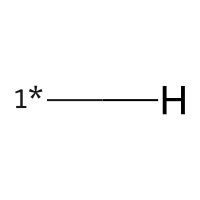
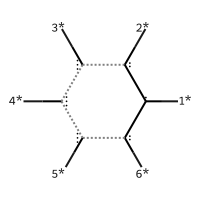
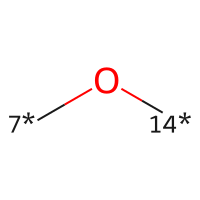
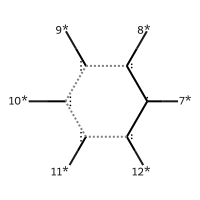
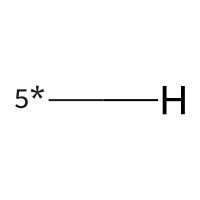
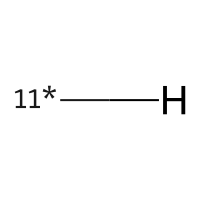
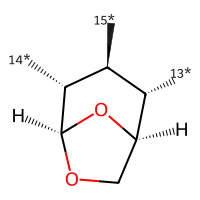
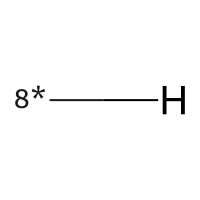
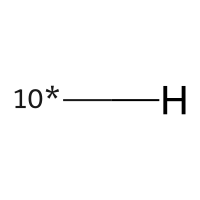
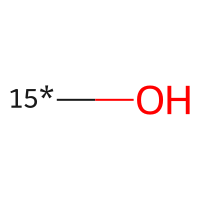
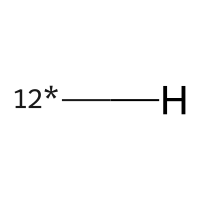
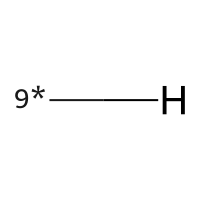
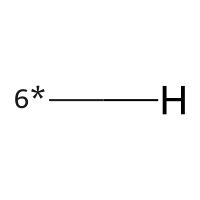
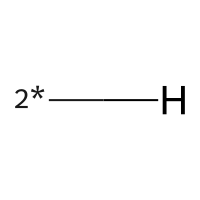
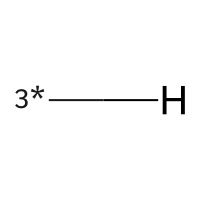
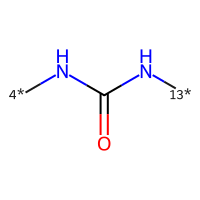

In [ ]:
ff.identify_connected_fragments('DUDE_12483238_hivint_decoys_C19H20N2O5_CIR.mol',input_type='molfile')

[13:53:36] Running LargestFragmentChooser
[13:53:36] Fragment: [c:1]1([H:37])[c:2]([H:38])[c:3]([H:39])[c:4]([C:7]([N:8]2[C:9](=[O:10])[C@:11]3([H:44])[C@:12]([C:28]([c:29]4[c:30]([H:54])[c:31]([H:55])[c:32]([O:36][H:58])[c:33]([O:35][H:57])[c:34]4[H:56])([H:52])[H:53])([H:45])[N:13]([H:46])[C@@:14]4([C@:15]3([H:47])[C:16]2=[O:17])[c:18]2[c:19]([H:48])[c:20]([Cl:27])[c:21]([H:49])[c:22]([H:50])[c:23]2[N:24]([H:51])[C:25]4=[O:26])([H:42])[H:43])[c:5]([H:40])[c:6]1[H:41]
[13:53:36] New largest fragment: [c:1]1([H:37])[c:2]([H:38])[c:3]([H:39])[c:4]([C:7]([N:8]2[C:9](=[O:10])[C@:11]3([H:44])[C@:12]([C:28]([c:29]4[c:30]([H:54])[c:31]([H:55])[c:32]([O:36][H:58])[c:33]([O:35][H:57])[c:34]4[H:56])([H:52])[H:53])([H:45])[N:13]([H:46])[C@@:14]4([C@:15]3([H:47])[C:16]2=[O:17])[c:18]2[c:19]([H:48])[c:20]([Cl:27])[c:21]([H:49])[c:22]([H:50])[c:23]2[N:24]([H:51])[C:25]4=[O:26])([H:42])[H:43])[c:5]([H:40])[c:6]1[H:41] (58)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[4*]Cl,,1,[27],"[[-1.2547220015, -4.0835622872, 0.487192994]]",[Cl]
1,[2*]N1C(=O)[C@H]2[C@@H](C1=O)[C@@]1(N[C@@H]2[3...,,3,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[[-0.4795644217, 1.4541599875, 1.4439436789], ...","[N, C, O, C, C, N, C, C, C, O, C, C, C, C, C, ..."
2,[6*]O,,1,"[36, 58]","[[5.5965589791, 0.8422678639, -1.0081562334], ...","[O, H]"
3,[1*]C[2*],,2,"[7, 42, 43]","[[-1.111525372, 2.7586872034, 1.6299121201], [...","[C, H, H]"
4,[1*]c1ccccc1,,1,"[4, 3, 2, 1, 6, 5, 37, 38, 39, 40, 41]","[[-1.8755037653, 3.2277447348, 0.4095052814], ...","[C, C, C, C, C, C, H, H, H, H, H]"
5,[3*]C[5*],,2,"[28, 52, 53]","[[-0.1817322225, -3.2789781804, 0.709597399], ...","[C, H, H]"
6,[5*]c1ccc([6*])c([7*])c1,,3,"[29, 30, 31, 32, 33, 34, 54, 55, 56]","[[0.859924238, -3.6226412143, 1.1788601329], [...","[C, C, C, C, C, C, H, H, H]"
7,[7*]O,,1,"[35, 57]","[[6.3256907751, 0.5824734215, 0.1513536663], [...","[O, H]"

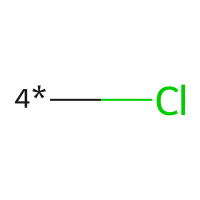
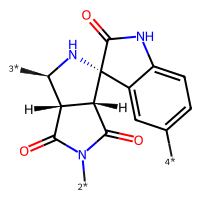
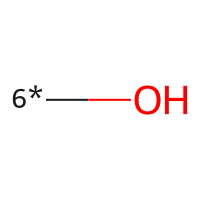
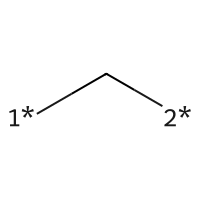
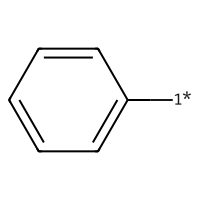
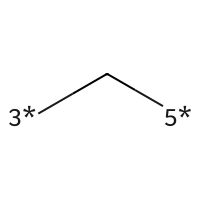
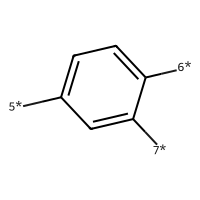
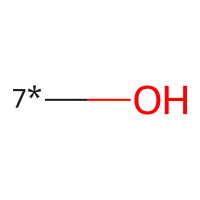

In [ ]:
mol = utils.mol_from_molfile('mol2.txt')['Molecule']
frag_frame = ff.identify_connected_fragments('mol2.txt',input_type='molfile',cml_file='cml2.txt')
frag_frame

In [ ]:
import pandas as pd
on_at_frame  = pd.DataFrame(frag_frame[frag_frame['numAttachments']==1])
col_names = list(on_at_frame.columns)
xyz_idx = col_names.index('xyz')
atoms_idx = col_names.index('Atoms')
labels_idx = col_names.index('Labels')
mol_idx = col_names.index('Molecule')

In [ ]:
on_at_frame.apply(lambda row : ff._find_H_xyz(mol, row[atoms_idx],row[xyz_idx],frag_frame),axis=1)

0    [-1.5066361391, -2.9230744207181822, 0.9659576...
2    [4.9527845444909095, 0.19182539097575746, -0.7...
4    [-1.3353170225626263, 2.8960878944161617, 1.27...
7    [5.669385428231314, -0.08055934605555537, 0.41...
dtype: object

In [ ]:
at_list = list(on_at_frame['Atoms'])[0]
xyz_list = list(on_at_frame['xyz'])[0]

In [ ]:
at_idx, neigh_idx = ff._find_neigh_notin_frag(mol,at_list)
at_idx

17

In [ ]:
symb = mol.GetAtomWithIdx(at_idx-1).GetSymbol()
symb
list_idx = at_list.index(at_idx)
list_idx
neigh_xyz = ff._find_neigh_xyz(frag_frame,neigh_idx)
at_xyz = xyz_list[list_idx]
# h_xyz = ff._move_along_bond(at_xyz,neigh_xyz,symb)

In [ ]:
import numpy as np
at_np = np.array(at_xyz)
nb_np = np.array(neigh_xyz)
bond = at_np-nb_np
bond
at_xyz


[2.4626448562, -2.0267979152, 1.0682645561]

,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[2*][C@]1([3*])CCOC1,,2,"[12, 13, 14, 15, 16, 36, 37, 38, 39, 40, 41]","[[-2.8451337745, -1.7532244311, -0.2831287448]...","[C, C, C, O, C, H, H, H, H, H, H]"
1,[3*]C(=O)[O-],,1,"[17, 18, 19]","[[2.4626448562, -2.0267979152, 1.0682645561], ...","[C, O, O]"
2,[1*]N1CCO[C@@H]2CCCC[C@H]21,,1,"[7, 5, 4, 3, 2, 1, 6, 10, 9, 8, 20, 21, 22, 23...","[[-1.8746630671, 0.4614485943, -1.4339625272],...","[N, C, C, C, C, C, C, O, C, C, H, H, H, H, H, ..."
3,[1*]C[2*],,2,"[11, 34, 35]","[[-1.6257683214, -2.3838742646, -0.0042002396]...","[C, H, H]"

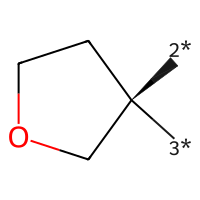
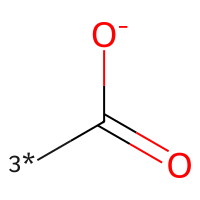
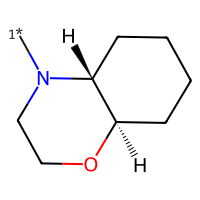
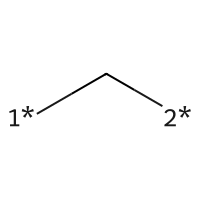

In [ ]:
frag_frame

In [ ]:
if "cml1.txt":
    print("HI")

HI


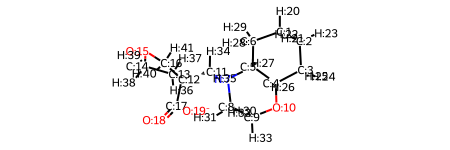

In [ ]:
from group_decomposition import utils
utils.mol_from_molfile('mol1.txt')['Molecule']

In [ ]:
temp = '<atomType id="a17" elementType="C" type="67" valence="4"/>'.split(' ')
int(temp[4].split('=')[1].split('/')[0].replace('"',''))

4

In [38]:
ff.identify_connected_fragments('Data/mol7.txt',input_type='molfile',cml_file='Data/cml7.txt')

[13:43:41] Running LargestFragmentChooser
[13:43:41] Fragment: [C:1]([C:2]([O:3][c:4]1[c:5]([S:23](=[O:24])(=[O:25])[O:26][c:27]2[c:28]([H:53])[c:29]([H:54])[c:30]([H:55])[c:31]([H:56])[c:32]2[H:57])[c:6]([H:38])[c:7]([H:39])[c:8]([C@:16]([C:17]([C:18](=[O:19])[H:50])([H:48])[H:49])([N:20]([C:21](=[O:22])[H:52])[H:51])[H:47])[c:9]1[S:10](=[O:11])(=[O:12])[C:13]([C:14]([H:41])([H:42])[H:43])([C:15]([H:44])([H:45])[H:46])[H:40])([H:36])[H:37])([H:33])([H:34])[H:35]
[13:43:41] New largest fragment: [C:1]([C:2]([O:3][c:4]1[c:5]([S:23](=[O:24])(=[O:25])[O:26][c:27]2[c:28]([H:53])[c:29]([H:54])[c:30]([H:55])[c:31]([H:56])[c:32]2[H:57])[c:6]([H:38])[c:7]([H:39])[c:8]([C@:16]([C:17]([C:18](=[O:19])[H:50])([H:48])[H:49])([N:20]([C:21](=[O:22])[H:52])[H:51])[H:47])[c:9]1[S:10](=[O:11])(=[O:12])[C:13]([C:14]([H:41])([H:42])[H:43])([C:15]([H:44])([H:45])[H:46])[H:40])([H:36])[H:37])([H:33])([H:34])[H:35] (57)


ValueError: Length of values (57) does not match length of index (10)